In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv("data_files/associations.csv")
data_df.head()

,vVirusNameCorrected,hHostNameFinal,WildDomInReference,DetectionMethod,DetectionQuality,Reference
0,Andes_virus,Abrothrix_longipilis,wild,PCR,2.0,Medina et al. 2009
1,Andes_virus,Abrothrix_olivaceus,wild,Antibodies,0.0,Sosa-Estani et al. 2002
2,Andes_virus,Abrothrix_sanborni,wild,Antibodies,0.0,Padula et al. 2004
3,African_horse_sickness_virus,Acinonyx_jubatus,wild,bcELISA,0.0,Alexander et al. 1995
4,Bluetongue_virus,Acinonyx_jubatus,wild,Antibodies,0.0,Alexander et al. 1994


In [3]:
data_df['DetectionQuality'] = data_df['DetectionQuality'].apply(lambda x: .1 if x == 0 else x)
data_df = data_df.dropna(subset=['DetectionQuality'])

In [4]:
data_df['DetectionQuality'].isnull().value_counts()

False    2804
Name: DetectionQuality, dtype: int64

In [19]:
data_df.head()

,vVirusNameCorrected,hHostNameFinal,WildDomInReference,DetectionMethod,DetectionQuality,Reference
0,Andes_virus,Abrothrix_longipilis,wild,PCR,2.0,Medina et al. 2009
1,Andes_virus,Abrothrix_olivaceus,wild,Antibodies,0.1,Sosa-Estani et al. 2002
2,Andes_virus,Abrothrix_sanborni,wild,Antibodies,0.1,Padula et al. 2004
3,African_horse_sickness_virus,Acinonyx_jubatus,wild,bcELISA,0.1,Alexander et al. 1995
4,Bluetongue_virus,Acinonyx_jubatus,wild,Antibodies,0.1,Alexander et al. 1994
5,Feline_astrovirus,Acinonyx_jubatus,wild,PCR,2.0,Atkins at al. 2009
6,Feline_calicivirus,Acinonyx_jubatus,wild,Antibodies,0.1,Munson et al. 2004
7,Feline_coronavirus,Acinonyx_jubatus,wild,Antibodies,0.1,Hofmann-Lehmann et al. 1996
8,Rabies_virus,Acinonyx_jubatus,wild,Antibodies,0.1,Thalwitzer et al. 2010
9,Akabane_virus,Aepyceros_melampus,wild,Antibodies,0.1,Davies et al. 1985


In [20]:
data_unstack = data_df.groupby(['vVirusNameCorrected',
                                 'hHostNameFinal'])[['DetectionQuality']].sum().unstack().fillna(0)

data_unstack.columns = list(data_unstack.columns.get_level_values(1))
data_unstack.index = list(data_unstack.index.get_level_values(0))

data_unstack.head(30)

,Abrothrix_longipilis,Abrothrix_olivaceus,Abrothrix_sanborni,Acinonyx_jubatus,Aepyceros_melampus,Aethomys_kaiseri,Aethomys_namaquensis,Akodon_azarae,Akodon_montensis,Akodon_paranaensis,...,Vespertilio_murinus,Vespertilio_sinensis,Vicugna_vicugna,Vulpes_corsac,Vulpes_velox,Vulpes_vulpes,Xerus_erythropus,Xerus_inauris,Zalophus_californianus,Zygodontomys_brevicauda
Adelaide_River_virus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adeno-associated_virus-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adeno-associated_virus-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adeno-associated_virus-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
African_green_monkey_polyomavirus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
African_green_monkey_simian_foamy_virus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
African_horse_sickness_virus,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
African_swine_fever_virus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aichi_virus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Akabane_virus,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_virus = data_unstack.dot(data_unstack.T)
df_mammal = data_unstack.T.dot(data_unstack)

In [7]:
B=nx.Graph()

B.add_nodes_from(data_df['vVirusNameCorrected'],bipartite=0)
B.add_nodes_from(data_df['hHostNameFinal'],bipartite=1)

B.add_weighted_edges_from(
    [(row['vVirusNameCorrected'], 
      row['hHostNameFinal'],
      row['DetectionQuality']) for idx, row in data_df.iterrows()])

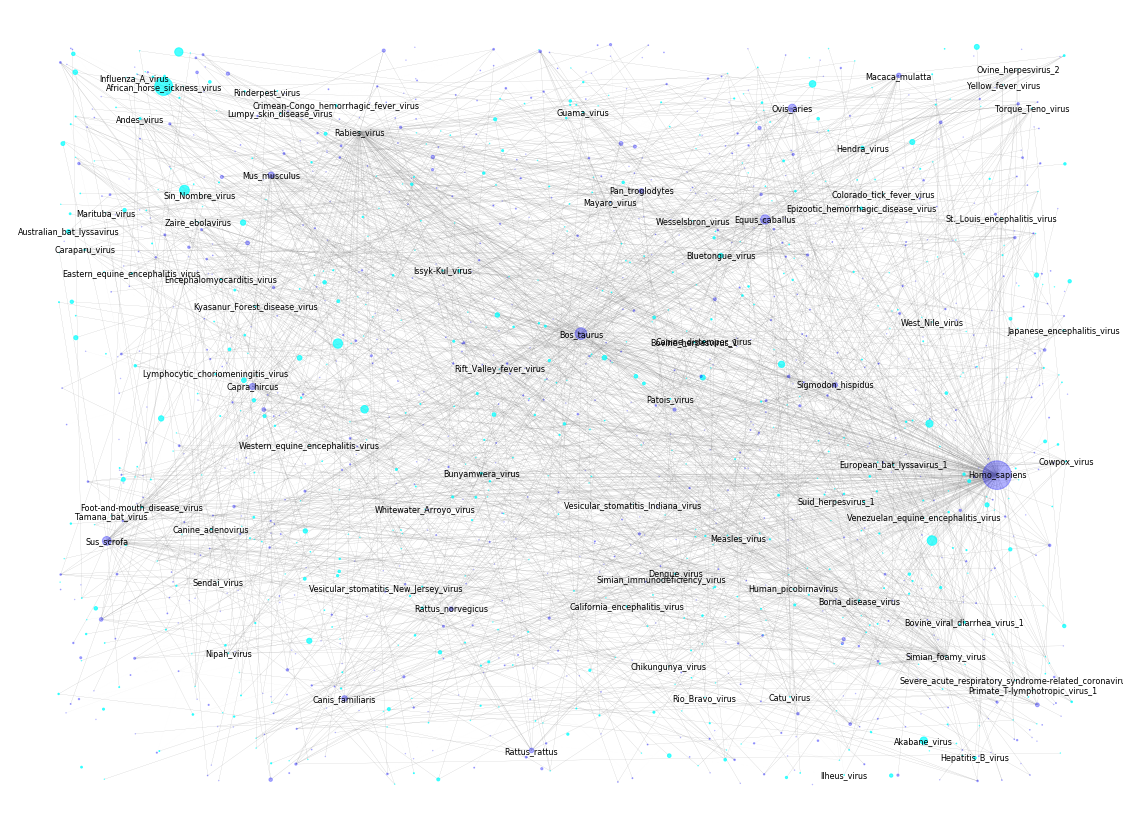

In [8]:
edges = B.edges()
weights = [(B[u][v]['weight']/6)**2 for u,v in edges]
degrees = nx.degree(B)
virus_sizes = [(v/3)**1.5 for k,v in dict(degrees).items() if k in data_unstack.index]
mammal_sizes = [(v/3)**1.5 for k,v in dict(degrees).items() if k in data_unstack.columns]

virus_filter = [k for k,v in dict(degrees).items() if k in data_unstack.index and v > 10]
mammal_filter = [k for k,v in dict(degrees).items() if k in data_unstack.columns and v > 20]

label_pos = {}
pos=nx.random_layout(B)

for key, value in pos.items():
    if key in virus_filter+mammal_filter:
        label_pos[key] = '{}'.format(key)
        
plt.figure(figsize=(20,15))
plt.axis('off')
nx.draw_networkx_nodes(B, 
                       pos, 
                       nodelist=data_unstack.index, 
                       node_color='cyan', 
                       alpha=0.7, 
                       node_size=virus_sizes)
nx.draw_networkx_nodes(B, 
                       pos, 
                       nodelist=data_unstack.columns, 
                       node_color='blue', 
                       alpha=0.3, 
                       node_size=mammal_sizes)

nx.draw_networkx_edges(B, 
                       pos, 
                       edge_color='gray', 
                       width=weights)

nx.draw_networkx_labels(B, 
                        pos, 
                        labels=label_pos,
                        font_size=8,
                        font_weight=10);

In [9]:
nx.write_gml(B, 'B.gml')

![title](data_files/all.png)

In [22]:
virus = {n for n, d in B.nodes(data=True) if d['bipartite']==0}
host = set(B) - virus

# project bipartite graph onto virus nodes keeping number of co-occurences, weighted degree
B_virus = nx.bipartite.weighted_projected_graph(B, virus)

# project bipartite graph onto host nodes keeping number of co-occurences, weighted degree
B_host = nx.bipartite.weighted_projected_graph(B, host, ratio=False)

In [53]:
B_host.degree()

DegreeView({'Rhinolophus_blasii': 12, 'Myotis_nigricans': 171, 'Lynx_rufus': 140, 'Hipposideros_lankadiva': 17, 'Eptesicus_serotinus': 27, 'Millardia_meltada': 6, 'Lophuromys_flavopunctatus': 29, 'Murina_aurata': 25, 'Mustela_lutreola': 12, 'Apodemus_sylvaticus': 65, 'Tragelaphus_strepsiceros': 237, 'Vespertilio_murinus': 160, 'Arvicanthis_neumanni': 4, 'Eulemur_albifrons': 34, 'Pongo_pygmaeus': 116, 'Rhinolophus_rouxii': 37, 'Atilax_paludinosus': 139, 'Akodon_simulator': 4, 'Mus_musculus': 278, 'Ursus_arctos': 9, 'Pseudalopex_vetulus': 139, 'Odobenus_rosmarus': 31, 'Bos_taurus': 368, 'Cystophora_cristata': 40, 'Nephelomys_albigularis': 6, 'Leopardus_geoffroyi': 22, 'Aethomys_kaiseri': 7, 'Canis_latrans': 186, 'Ursus_maritimus': 32, 'Tatera_indica': 61, 'Hystrix_africaeaustralis': 40, 'Callithrix_jacchus': 81, 'Tamias_striatus': 179, 'Pipistrellus_hesperus': 139, 'Platyrrhinus_helleri': 50, 'Sigmodon_toltecus': 19, 'Lobodon_carcinophaga': 22, 'Elephas_maximus': 213, 'Chaetophractus_vel

In [52]:
#Code from textbook Social Network Analysis for Startups by Maksim Tsvetovat and Alexander Kouznetsov
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,weight=edata['weight'])
    return g2

def island_method(g, iterations = 5):
    weights = [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
 

1 367 1
7 49 1
13 13 1
19 8 1
25 6 1
31 4 1


In [55]:
# virus islands analysis
cc = list(B_virus.subgraph(c) for c in nx.connected_components(B_virus))[0]
islands = island_method(cc)

for i in islands:
    print(i[0], len(list(nx.degree(i[1]))), len(list(connected_component_subgraphs(i[1]))))

1 302 3
6 60 3
11 21 2
16 8 2
21 6 2
26 2 1


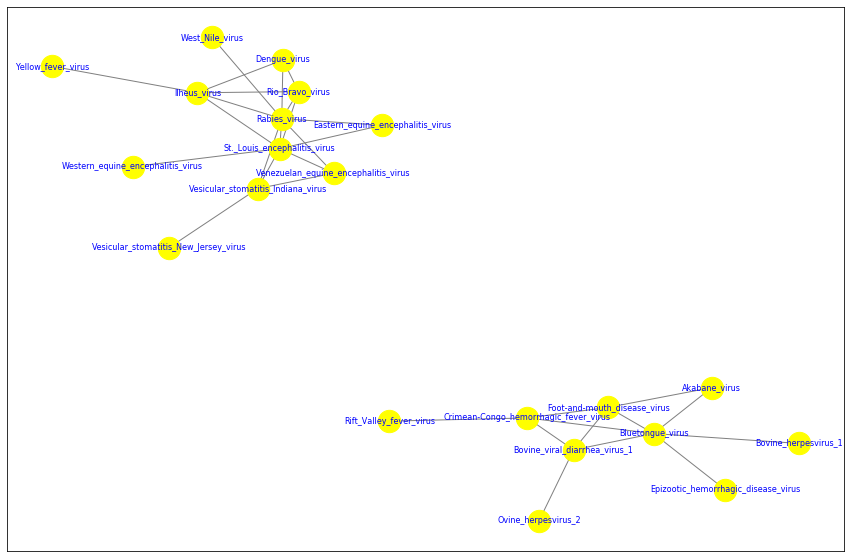

In [56]:
# use 11 for the threshold
v11 = trim_edges(B_virus, 11)

plt.figure(figsize=(15,10))
pos = nx.spring_layout(v11, iterations = 20)
nx.draw_networkx_nodes(v11, pos, node_color='yellow', node_size=500)
nx.draw_networkx_edges(v11, pos,  edge_color='gray')
nx.draw_networkx_labels(v11, pos, font_size=8, font_color ='blue')

plt.show()

In [57]:
# hosts islands analysis
cc = list(B_host.subgraph(c) for c in nx.connected_components(B_host))[0]
islands = island_method(cc)

for i in islands:
    print(i[0], len(list(nx.degree(i[1]))), len(list(connected_component_subgraphs(i[1]))))

1 367 1
7 49 1
13 13 1
19 8 1
25 6 1
31 4 1


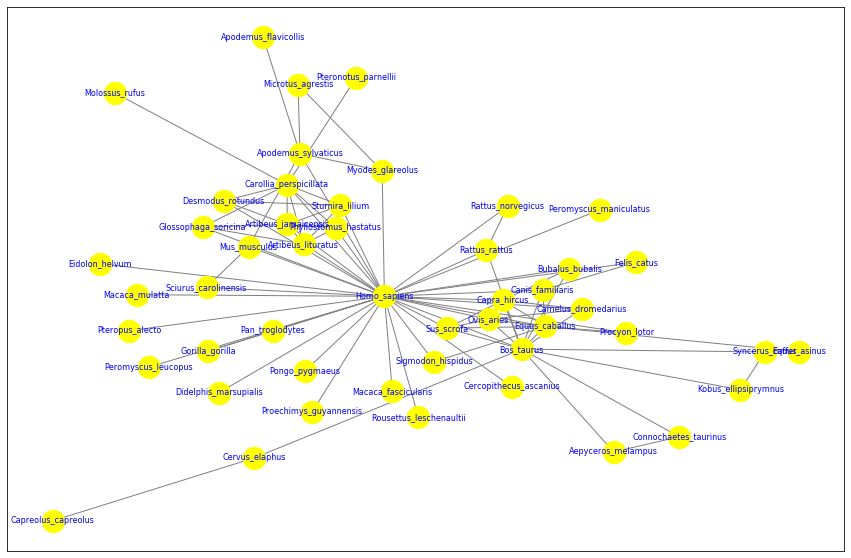

In [54]:
# use 7 for the threshold
h11 = trim_edges(B_host, 7)

plt.figure(figsize=(15,10))
pos = nx.spring_layout(h11, iterations = 20)
nx.draw_networkx_nodes(h11, pos, node_color='yellow', node_size=500)
nx.draw_networkx_edges(h11, pos,  edge_color='gray')
nx.draw_networkx_labels(h11, pos, font_size=8, font_color ='blue')

plt.show()